# Physics

In [13]:
from autograd import elementwise_grad as egrad
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In physics, gradients are found everywhere. For example, we know that velocity is the derivative of distance w.r.t. time.

$$ v = \frac{dx}{dt} $$

Thus, if we know how $ x $ changes as a function of $ t $, we just have to take the gradient and use that to find the velocity at any point in time.

Likewise, acceleration is the derivative of velocity with respect to time. Thus,

$$ a = \frac{dv}{dt} $$

Let's start with a simple case - where we observe a perfect spring in motion. The length of the spring w.r.t. time follows a sine curve. 

$$ x = sin(t) $$

The velocity will therefore follow a cosine function.

$$ v = \frac{dx}{dt} = cos(t) $$

And the acceleration will follow a negative sine function.

$$ a = \frac{dv}{dt} = -sin(t) $$

We can visually confirm these by plotting them.

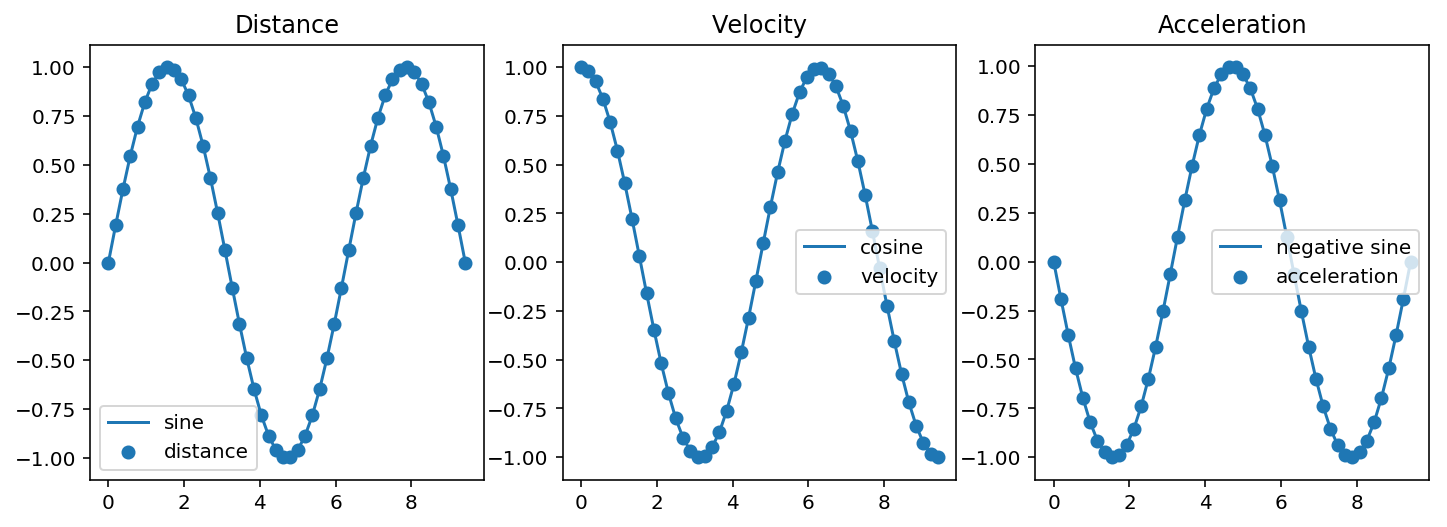

In [31]:
def distance(t):
    return np.sin(t)


velocity = egrad(distance)
acceleration = egrad(velocity)

t = np.linspace(0, 3*np.pi)
x = distance(t)
v = velocity(t)
a = acceleration(t)

gs = GridSpec(nrows=1, ncols=3)

# Plot distance
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(gs[0])
ax.scatter(t, x, label="distance")
ax.plot(t, np.sin(t), label='sine')
ax.legend()
ax.set_title('Distance')

ax = fig.add_subplot(gs[1])
ax.scatter(t, v, label="velocity")
ax.plot(t, np.cos(t), label='cosine')
ax.legend()
ax.set_title('Velocity')

ax = fig.add_subplot(gs[2])
ax.scatter(t, a, label="acceleration")
ax.plot(t, -np.sin(t), label='negative sine')
ax.legend()
ax.set_title('Acceleration')

plt.show()

Let's now think about the case when a ball is moving around a circle. 

$$ y^2 + x^2 = r^2 $$

If we set $ r = 5 $, we get a circle of radius 5.

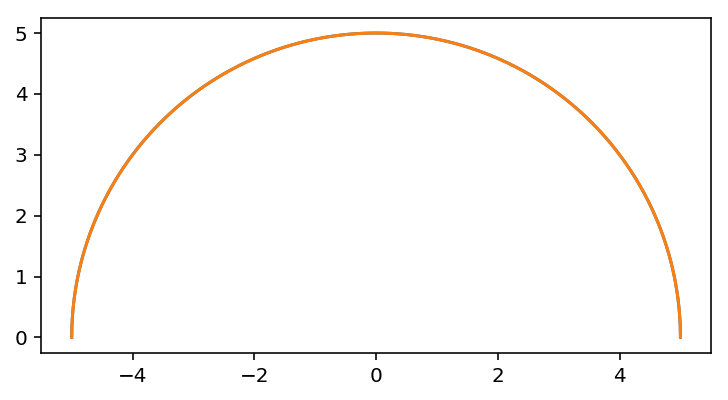

In [45]:
def circle(x, r=5):
    root = np.sqrt(np.power(r, 2) - np.power(x, 2))
    return root

x = np.linspace(-5, 5, 3000)
y = circle(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(x, neg_y)
ax.set_aspect('equal')  # this makes the circle look like an actual circle.

/Users/ericmjl/anaconda/envs/autograd/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:97: RuntimeWarning: divide by zero encountered in power
  defvjp(anp.sqrt,    lambda ans, x : lambda g: g * 0.5 * x**-0.5)


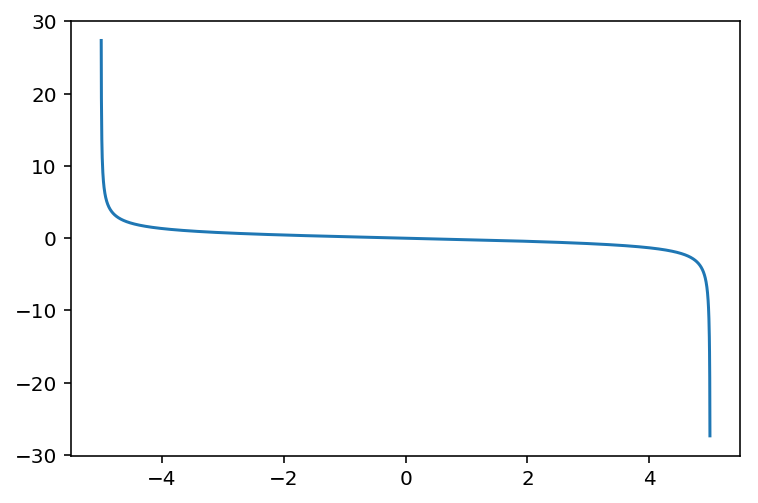

In [47]:
y_p = egrad(circle)(x)
plt.plot(x, y_p)